# Intelligent Systems 2022: Practical Assignment No 1

This is the first assignment for Intelligent Systems. Since we are only starting, we will try to keep it short and will try to get you familiar with some basic data structures and will have a first look at search algorithms.



## Graphs, Trees, and a bit of Search

Your name: Sebastião Manuel Inácio Rosalino

Your VUNetID: sxx209  

If you do not provide your name and VUNetID we will not accept your submission. 

### Learning objectives

At the end of this exercise you should be able to understand basic ideas on how to represent graphs and trees in python. Furthermore, we will have a look into search algorithms in trees.

1. Understanding graph datastructures
2. Make small modifications of the code to implement a tree datastructure
3. Modify a tree search algorithm

### Practicalities

Follow this Notebook step-by-step. 

Of course, you can do the exercises in any Programming Editor of your liking. 
But you do not have to. Feel free to simply write code in the Notebook. Please use your studentID+Assignment1.ipynb as the name of the Notebook.  

Note: Unlike the courses dedicated to programming we will not evaluate the style of the programs. But we will, however, test your programs on other data that we provide, and your program should give the correct output to the test-data as well.

As was mentioned, the assignment is graded as pass/fail. To pass you need to have either a full working code or an explanation of what you tried and what didn't work for the tasks that you were unable to complete (you can use multi-line comments or a text cell).

## Initialising 

First, let us make sure the necessary packages are installed, and imported. Run the following code:

In [1]:
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install networkx
!{sys.executable} -m pip install decorator==5.0.9
import datetime
import numpy as np
from numpy import random


# This might produce a warning that numpy is already installed. 

## Representing Graphs in Python



<img src="graph.png" width="300"/>


### Graph with Dictionaries

#### Task 1
Represent the graph from the figure as in a Python dictionary and describe your datastructure.

In [2]:
# Write your code here

dict_graph = {'nodes': set(('a', 'b', 'c', 'd', 'e', 'f')),
              'edges': set([frozenset(['a','b']), frozenset(['b','c']), frozenset(['b','d']), frozenset(['c','f']), frozenset(['c','e']),
                           frozenset(['c','d'])])} 

In [3]:
# Printing the dictionary representing the graph

dict_graph

{'nodes': {'a', 'b', 'c', 'd', 'e', 'f'},
 'edges': {frozenset({'b', 'c'}),
  frozenset({'a', 'b'}),
  frozenset({'c', 'e'}),
  frozenset({'c', 'f'}),
  frozenset({'b', 'd'}),
  frozenset({'c', 'd'})}}

In [4]:
dict_graph_explanation = """

    I created a Python dictionary to represent the graph from the figure. This dictionary variable was named dict_graph and it is 
composed of two keys, namely 'nodes' and 'edges'.
    On the one hand, the dictionary key 'nodes' comprises the nodes of the graph and, therefore, will have the set of nodes 
{a, b, c, d, e, f} as its values.
    On the other hand, the key 'edges' comprises the edges of the graph responsible for establishing the relations between the graph's nodes,
and, therefore, will have the set of edges { {'a', 'b'}, {'b','c'}, {'b', 'd'}, {'c', 'f'}, {'c', 'e'}, {'c', 'd'} } as its values. 
Noteworthy to mention that as we are dealing with an undirected graph, every edge disconsiders any sense of direction, treats both end 
nodes samely and, thus, is represented as a set.

"""

### Graph with Adjacency Matrices

As mentioned in the working groups and the 1st working group exercise sheet, you can represent graphs also as adjancency matrices with 0 and 1. This is a standard format for representing graphs that we therefore will also explore practically.


#### Task 2
Come up with your own adjacency matrix representation for the graph from above in Python.
Then describe what you did in a couple of sentences.

In [5]:
# Write your adjacency matrix code here
# 0 = a, 1 = b, 2 = c, 3 = d, 4 = e, 5 = f


adjacency_matrix = np.matrix([[0, 1, 0, 0, 0, 0], [1, 0, 1, 1, 0, 0], [0, 1, 0, 1, 1, 1], [0, 1, 1, 0, 0, 0], [0, 0, 1, 0, 0, 0], 
                              [0, 0, 1, 0, 0, 0]]) 

In [6]:
# Printing the numpy matrix representing the adjacency matrix

adjacency_matrix

matrix([[0, 1, 0, 0, 0, 0],
        [1, 0, 1, 1, 0, 0],
        [0, 1, 0, 1, 1, 1],
        [0, 1, 1, 0, 0, 0],
        [0, 0, 1, 0, 0, 0],
        [0, 0, 1, 0, 0, 0]])

In [7]:
adj_graph_explanation = """

First I created a variable called 'adjacency matrix' which is a matrix object from the Numpy library. Then, I populated each entry [p, i]
where p represents the index of the line and i the index of the columns of this matrix with 0 or 1. The entry [p, i] will be populated with 0 
if there is no connection in the graph between nodes p and i. Otherwise, that is, if there is an edge responsible for establishing a 
connection between nodes p and i, the entry [p, i] will assume the value of 1. The examples of the nodes p and i will assume every of 
this graph's nodes {a, b, c, d, e, f}. For reasons of understanding, the matrix was built following the defined order, that is, 
the lines and columns follow the order: 0 = a, 1 = b, 2 = c, 3 = d, 4 = e, 5 = f.

"""

## Representing Trees in Python

As for many abstract datastructures, there is many ways on how to represent them in Python. In this tasks, we will have a look at some helpful representations for graphs and trees. 
There are actually many more that you will encounter throughout your studies, because graphs and trees are maybe the most important data structures in AI and computer science.


### Binary Trees

In [8]:
class Node:
   
    def __init__(self, value=None):
        self.value = value
        self.left_child = None
        self.right_child = None

        
class Tree:
  
    def __init__(self):
        self.root = None

        
    def getRoot(self):
        return self.root

    
    def add(self, value):
        if self.root is None:
            self.root = Node(value)
            return True
        else:
            return self._add(value, self.root)

            
    def _add(self, value, node):
        
        if value < node.value:
            if node.left_child is not None:
                self._add(value, node.left_child)
            else:
                node.left_child = Node(value)
                
        elif value > node.value:
            if node.right_child is not None:
                self._add(value, node.right_child)
            else:
                node.right_child = Node(value)
                
        else:
            #print("No value was inserted since that value is already in the Tree")
            return False
        return True

            
    def search(self, value_to_be_searched):
        if self.root is None:
            return None
        else:
            return self._search(value_to_be_searched, self.root)
        

    def _search(self, value_to_be_searched, node):
        if node.value == value_to_be_searched:
            print(f"The node with value {node.value} has been successfully found in the Tree")
            return node
        
        elif (node.left_child is not None and node.value > value_to_be_searched):
            self._search(value_to_be_searched, node.left_child)
                
        elif (node.right_child is not None and node.value < value_to_be_searched):
            self._search(value_to_be_searched, node.right_child)
            
        else:
            print("Could not find the element tried to be searched in the Tree")
                
                
    def visualize_tree(self):
        if self.root != None:
            self._visualize_tree(self.root, 0)
            
    def _visualize_tree(self, node, depth):
        if node != None:
            self._visualize_tree(node.left_child, depth + 1)
            print(f"Depth:{depth} Node:{node.value}")
            self._visualize_tree(node.right_child, depth + 1)

Try to play around with the code of the binary tree to get an idea of what exactly is happening. 
Also try to draw a binary tree on paper, to get a better idea of what it is.

### Task 3
Add 20 nodes to the binary tree and complete the method that searches for the node with a certain value.
Afterwards describe the algorithm and the idea of your algorithm in at least 5 sentences.

*Hint: It might be a good idea to have a closer look at the add function to complete the search function*

In [9]:
# Adding the 20 nodes randomly

T = Tree()

import random 

number_of_inserted_nodes = 0

while number_of_inserted_nodes < 20:
    random_node = random.randint(0, 100)
    if T.add(random_node):
        number_of_inserted_nodes += 1

In [10]:
# Visualizing the tree

T.visualize_tree()

Depth:2 Node:0
Depth:4 Node:1
Depth:3 Node:4
Depth:1 Node:9
Depth:0 Node:18
Depth:2 Node:30
Depth:3 Node:36
Depth:1 Node:37
Depth:2 Node:40
Depth:4 Node:47
Depth:5 Node:48
Depth:7 Node:52
Depth:8 Node:56
Depth:9 Node:65
Depth:6 Node:66
Depth:3 Node:75
Depth:5 Node:82
Depth:4 Node:90
Depth:5 Node:99


In [11]:
explain_binary="""

To begin with, I finished the methods of the Tree class 'add' and 'search' as well as its '_search' and '_add' private methods. 
A new node will be added to the tree as a left child if its associated value is lower than its parent's, or it will be added as a 
right child if its added value is greater than its parent's. If the value of the node trying to be added is the same as its parent, 
it means that there is already a node with the same value present in the tree, so its addition makes no sense. 
Finally, the function will return True if the node was successfully added to the tree or False if the addition attempt was unsuccessful.

Secondly, in the process of searching for a node in the tree, it will be found immediately if its associated value is equal to the root's.
If it is smaller and the node where the search is in a given recursion (starting at the root) has a left child, the function will be 
called again with the difference that now the left child will be the new node where the search will continue its path.
If it is greater and the node where the search is in a given recursion (starting at the root) has a right child, the function will be 
called again with the difference that now the right child will be the new node where the search will continue its path.
Finally, if the search goes all the way through the tree and the current node is a leaf, obviously, without children, and the target node
in the search has not been found, it is concluded that the node is simply not present in the tree.

Finally, in order to test the algorithm, I added 20 nodes to the tree each with random values from 0 to 100 (I took into account the 
possible cases of generating the same number, hence the while loop that will be active while the tree does not have the 20 nodes required). 
This addition was confirmed with the subsequent visualization of the tree, showing each value of every node and its depth in the tree, 
as well as using the method 'search' that printed a success message (specified in the '_search' method) if the node was found
in the tree, or failure (also specified from the '_search' method) if the node is not present in the tree.

"""

## NetworkX

In the next step, we will have a look at one of Python's most popular libraries for graphs and trees.
You can have a quick look at the [libraries tutorial](https://networkx.org/documentation/stable/tutorial.html) to get an idea on how it works.


As a first example, we can initialize a graph object from the adjacency matrix that you have created above.
And we will also draw this graph.
If this does not work, try to reinstall the packages from above and reboot the notebook.
There might be an issue with the *Decorator* package. 

Afterwards, we will look into creating a tree manually.


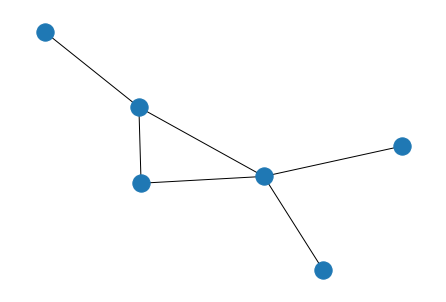

In [12]:
import networkx as nx
G = nx.from_numpy_matrix(np.array(adjacency_matrix))
nx.draw(G)

### Task 4

Create a new NetworkX graph and manually add nodes and edges, so that you end up with a full 3-ary tree of depth 2.

Afterwards, use the draw function to check, if it worked out.

In [13]:
# Put your solution here.

S = nx.Graph()


# Adding the 13 nodes (with values ranging from 0 to 12) needed for a full 3-ary tree of depth 2

for i in range(13):
    S.add_node(i)
    
    
# Establishing the edges    

def add_edges(initial_node, number_of_children, first_child, graph):
    for i in range(number_of_children):
        graph.add_edge(initial_node, first_child + i)
    return first_child + number_of_children

# We know that, to begin, the first child of the root with value 0 will be a node with value 1

first_child = 1 

# We will iterate through the edge adding process 3 times since the tree depth must be 2 (0, 1, 2)

for i in range(4):
    first_child = add_edges(i, 3, first_child, S)

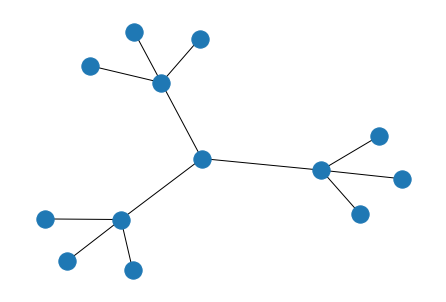

In [14]:
nx.draw(S)

### Final Task: Collect all the results

Fill in your student number in the variable and then run this cell (and all the cells above) to generate the text file that you have to hand in together with the notebook on canvas!

In [15]:
def exportToText(*args):
    with open(args[0], "w") as f:
        for argument in args:
            f.write("{}\n".format(argument))

exportToText("assignment1.txt",2781583, dict_graph_explanation, adj_graph_explanation, explain_binary)